Import Data

# Entering the Movie Industry

**Authors:** Lhamu Tsering, Justin Fernandez
***

## Overview

## Business Problem

The OTT (Over-the-top) video streaming market has grown significantly in the last decade. Major OTT video streaming companies like Netflix, Amazon Prime Video, Hulu, have had much success in not just creating a platform for video streaming, but also creating their own original video content. The market size of the Movie and Video production industry is over $30 billion and Microsoft wants to join in. Without much experience in the field, they need our help with getting an insight into what they should be creating to be the most successful. 

**The questions that we seek to answer are**:
1. What genre of movie is the most successful domestically / worldwide?
2. Who should be hired to give the highest chance of a highly rated movie?
3. 
4. What genre of movies are people most excited about voting on ?
5. Are movie ratings affected by movie runtimes ?


**The reason we seek to anser those questions**:
1. For a new company a couple unncessful movie could be the demise of their brand a chance of making it in the market. By creating movies with genres that appeal to the most people you give yourself the highest chance of a positive return on investment.
2. Some actors, directors, and others on the movie set are better than others. Hiring those who a part of highly rated movies gives you better chance of creating a good movie.
3. 
4. Most probably than not, a person will only vote on a movie if they have seen it in the first place. For someone to be drawn to watch a movie and then actually go online to the imdb site and vote on it tells us that the movie brought some level of excitement. I wanted to find in what genre do the movies most voted on fall in. For Microsoft this inquiry tells them which genre movies are most popular among movie goers.
5. In knowing whether the time length of a movie affects how high a movie is rated, gives us an idea of whether people are put off by long movies or not. Based on the data, we can also provide some inference on the ideal time length of a movie. 


**FROM TEMPLATE**

Questions to consider:
* What are the business's pain points related to this project?
* How did you pick the data analysis question(s) that you did?
* Why are these questions important from a business perspective?

**FROM TEMPLATE**
***

## Data Understanding

The data used in this project comes from websites that specialize in movies/tv-shows and all information on those. The websites are Box Office Mojo, IMDb, Rotten Tomatoes, and TheMovieDB.org. In order to get a better understanding I am going to highlight the key components of each dataset.
1. **imdb.title.crew.csv.gz** - This contains the directors and writers for 146,000 movies. (146144 rows × 3 columns)
2. **tmdb.movies.csv.gz** - This conains TMDb information like rating, popularity, and id. Along with that it also has the genres, release date, and title. (26517 rows × 10 columns)
3. **imdb.title.akas.csv.gz** - This contains the titles used in other countries. (331703 rows × 8 columns)
4. **imdb.name.basics.csv.gz** - This contains the employess of the movie and their specfic role. (606648 rows × 6 columns)
5. **rt.reviews.tsv.gz** - This contains the reiews given on Rotten Tomatoes as well as the information about the reviewer. (54432 rows × 8 columns)
6. **imdb.title.basics.csv.gz** - This contains the general infomation on a movie like start year, runtime, and genres. (146144 rows × 6 columns)
7. **rt.movie_info.tsv.gz** - This contains the general information that Rotten Tomatoes provides. This includes a synopsis, rating, genre, directors, and much more. (1560 rows × 12 columns)
8. **tn.movie_budgets.csv.gz** - This contains the budget and gross income. (5782 rows × 6 columns)
9. **bom.movie_gross.csv.gz** - This contains the domestic and foreign gross. (3387 rows × 5 columns)
10. **imdb.title.principals.csv.gz** - This contains information on actors and the movies they were in. (1028186 rows × 6 columns)
11. **imdb.title.ratings.csv.gz** - This contains the movie ratings and the number of votes information from the IMDb site. (73856 rows x 3 columns)

#### Question 1
In order to answer question one, I will be using the **tmdb.movies.csv.gz** and **bom.movie_gross.csv.gz**. The reason for the **tmdb.movies.csv.gz** dataset is to access all movie titles along with their genre ids. The **bom.movie_gross.csv.gz** dataest will be used to access the domestic box office for every movie in that dataset. Box office is the total amount of money spent at movie theaters to see that specific movie. These two splices of the dataset will be combined to show the domestic box office per movie whihc will then be further processed to show box office based on genre.

#### Question 2
In order to answer question two, I will be using the **imdb.name.basics.csv.gz** and **imdb.title.ratings.csv.gz**. The **imdb.name.basics.csv.gz** will be used to access all the employees of movies along with their respective titles they are most known for. The **imdb.title.ratings.csv.gz** will be used to asign ratings to the movies that the employees are most known for. This will allow me to rank players based off the ratings of their most known movie.

#### Question 3


#### Question 4 and 5

In order to answer questions four and five, the datasets **imdb.title.basics.csv.gz**, **imdb.title.ratings.csv.gz** and the **tmdb.movies.basics.gz** datasets were used. the datasets were merged to produce a single dataset called `movie_ratings_info`, on which all analysis was performed. This dataset includes the movies and their properties that describe it like, movie runtime, movie average rating, the number of voters who voted on the ratings, movie release dates, and the genre the movie belonged to. The dataset has 71097 observations across 11 variables. This compiled data will be further prepared to use for evaluation.

The sample of movies in the dataset are movies that can be found on the IMDB and the TMDB websites and for whom movie rating information was available. The target variable here is the average rating a movie received. The average_rating variable is the average value of the movie ratings information from the two websites. An average rating value is between the range of 1 to 10 where 10 is the highest rating indicating a well approved movie. 

The ratings value from the IMDB site, is calculated by taking a weighted average for ratings provided by all IMDB user, according to the [IMDB](https://help.imdb.com/article/imdb/track-movies-tv/ratings-faq/G67Y87TFYYP6TWAV#calculate) site. The rating ranges from 1 to 10. 
For rating value from the TMDB site, when users go online on the TMDB site, they get to vote on the movies by how many stars they want to give on a range of 1 to 5. Each star carries two points which bring the vote up to a scale of 1 to 10.  

***
**FROM TEMPLATE**

Questions to consider:
* Where did the data come from, and how do they relate to the data analysis questions?
* What do the data represent? Who is in the sample and what variables are included?
* What is the target variable?
* What are the properties of the variables you intend to use?

**FROM TEMPLATE**
***

## Question 1 (a)


### Data Preparation

What genre of movie is the most successful domestically / worldwide?

The first step of this process was to extract the data we needed from the tables and put them into their own dataframes. Next was to merge these two dataframes on the title of the movie so that I would have a table containing `title`, `genre_ids`, and `domestic_gross`.

***
Questions to consider:
* Were there variables you dropped or created?
* How did you address missing values or outliers?
* Why are these choices appropriate given the data and the business problem?
***

In [1]:
# Importing os for getting path names for data
import os
# Importing pandas 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data_path = os.path.join('data','zippedData')
files = os.listdir(data_path)

In [3]:
import_paths = [os.path.join(data_path,file) for file in files]

In [4]:
data = {}
for path in import_paths:
    try:
        df = pd.read_csv(path) #this will fail on the .tsv
    except:
        df = pd.read_csv(path,delimiter='\t', encoding='unicode_escape')
    data[path.split('/')[-1]] = df

In [5]:
# getting movie title and genre from the df
id_df = data['tmdb.movies.csv.gz'].loc[:,['genre_ids','original_title']]

# changing column title to be the same with other df
id_df.rename(columns={'original_title':'title'},inplace=True)

# getting the title and gross into sep df
money_df = data['bom.movie_gross.csv.gz'].loc[:,['title','domestic_gross']]

# merging the movie info with the gross income info
money_id_df = money_df.merge(id_df,how='left',on='title') 

The next step was to clean the dataframe so that there were niether duplicates nor NaN's. The data set where the `title` and `genre_ids` did contain duplicate movie titles but these were removed as their `genre_ids` were not correct. The next set of drops were to drop NaN's from `genre_ids` and `domestic_gross`. The problem here was that in the **tmdb.movies.csv.gz** dataframe some of the movies did not have `genre_ids` and was not due to the merge. The same problem applies to `domestic_gross` in that the **bom.movie_gross.csv.gz** dataframe did not have `domestic_gross` for all movies. 

In [6]:
# dropping duplicate titles that had wrong id's
money_id_df.drop_duplicates(subset='title',inplace = True)

# getting rid of movies that do not have genres
money_id_df.dropna(subset=['genre_ids'],inplace=True)

# dropping columns that do no have domestic_gross
money_id_df.dropna(subset=['domestic_gross'],inplace=True)

Now that the data is cleaned and stored I am going to change all genre ID's into the genre that they represent.

In [7]:
# this dictonary will conver the IMDb genre id's to their associated english word
genre_id_to_string = {28:'action',
                      16:'animated',
                      99:'documentary',
                      18:'drama',
                      10751:'family',
                      14:'fantasy',
                      36:'history',
                      35:'comedy',
                      10752:'war',
                      80:'crime',
                      10402:'music',
                      9648:'mystery',
                      10749:'romance',
                      878:'sci-fi',
                      27:'horror',
                      10770:'TV-movie',
                      53:'thriller',
                      37:'western',
                      12:'adventure'}

In [8]:
# because genre_ids are stored as a string in between brackets and seperated by commas 
# this function will clean that to return an actual list of real words
# example
# input: '[28,16,99]' (type = string)
# output: [action, animated, documentary] (type = list)
def convert_id_to_name(id_list):
    id_list = id_list[1:-1].replace(',','').split()
    for id in enumerate(id_list):
        id_list[id[0]] = genre_id_to_string[int(id[1])]
    return(id_list)

# applying convert_id_to_name so that the ids are now readable names
money_id_df.genre_ids = money_id_df.genre_ids.apply(lambda x: 'nan' if str(x) == 'nan' else convert_id_to_name(x))

Now that the data is in the correct format I used the following for loop iteration along with a dictionary to iterate throuhg the `genre_ids` and create a key value pair of the genre and a list of the `domestic_gross`that each genre was a part of. For example, if _Avengers_ is classfied as action, fantasy, and adventure and grossed \\$10,000,000 domestically. Those three genres would be assigned \\$10,000,000 to their list. After these lists are created the mean is calculated to show the mean domestic box office of any movie containing that genre.

In [9]:
# dictionary to hold the following key value pairs:
# key = genre, value = total money grossed
money_for_each_genre = {}
for genre_money in money_id_df.iterrows():
    ids = list(genre_money[1])[-1]
    money = list(genre_money[1])[-2]
    if ids != 'nan':
        for id in ids:
            if id in money_for_each_genre.keys():
                money_for_each_genre[id].append(money) 
            else:
                money_for_each_genre[id] = [money]
                
# going through dictionary to take the mean of all movies in a genre
for genre_money in money_for_each_genre.items():
    money_list = genre_money[1]
    money_for_each_genre[genre_money[0]] = int(np.mean(money_list))

The dictionary is then converted back to a dataframe for ease of use with matplotlib. This dataframe was then sorted by domestic box office to have a descending list of domestic box office.

In [10]:
# converting back to dataframe for easy sorting / extraction for graphing
final_dataframe = pd.DataFrame.from_dict(money_for_each_genre,orient='index')
final_dataframe.sort_values(by=0,ascending=False,inplace=True)

### Data Modeling
Describe and justify the process for analyzing or modeling the data.

***
Questions to consider:
* How did you analyze or model the data?
* How did you iterate on your initial approach to make it better?
* Why are these choices appropriate given the data and the business problem?
***

In [11]:
# Here you run your code to model the data

Text(0, 0.5, 'Gross Domestic Box Office')

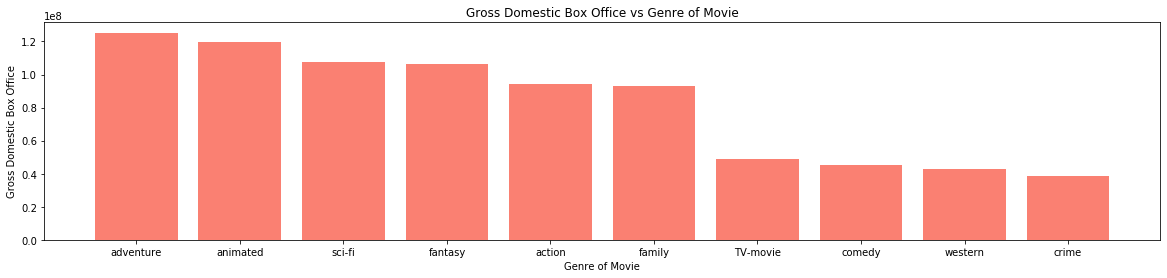

In [12]:
x = final_dataframe.index
y = final_dataframe.iloc[:,0]
x = x[0:10]
y = y[0:10]
fig = plt.figure(figsize = (20,4))
ax = fig.subplots()
ax.bar(x,y,color='salmon')
ax.set_title('Gross Domestic Box Office vs Genre of Movie')
ax.set_xlabel('Genre of Movie')
ax.set_ylabel('Gross Domestic Box Office')


### Evaluation

In the visuatlization of this problem we can see that there are some genres that on average bring in much more money at the box office than others. Adventure, animated, sci-fi, fantasy, action, and family make significantly more money as seen by the massive drop-off from family to TV-movie. This will help Microsoft choose what kind of movies to make from the beggining to maximize their chance of making a profit on their movies. 

***
Questions to consider:
* How do you interpret the results?
* How well does your model fit your data? How much better is this than your baseline model?
* How confident are you that your results would generalize beyond the data you have?
* How confident are you that this model would benefit the business if put into use?
***

## Question 1 (b)

In order to further reinforce the insight provided in question 1 (a) I recreated the same work on a different dataset containing domestic and worldwide box office. Almost the same exact process was done except for the use of `worldwide_gross` as opposed to just `domestic_gross`.

In [13]:
# get the gross income from domestic and worldwide
tn_money = data['tn.movie_budgets.csv.gz']
tn_money.rename(columns={'movie':'title'},inplace=True)

# get the genre ids
imdb_movies = data['tmdb.movies.csv.gz'].loc[:,['genre_ids','original_title']]
imdb_movies.rename(columns={'original_title':'title'},inplace=True)

# merge the two cells on title
money_for_movies = imdb_movies.merge(tn_money,how='left',on='title') 

# select wanted data
money_for_movies = money_for_movies.loc[:,['title','genre_ids','worldwide_gross']]

# drop columns without a domestic gross
money_for_movies.dropna(subset=['worldwide_gross'],inplace=True)

# clean the money columns due to $ and , being used to represent money (ex ten thousand dollars  = $10,000)
def clean_money(money):
    money = money.replace('$','')
    return float(money.replace(',',''))

# cleaning money column
money_for_movies.worldwide_gross = money_for_movies.worldwide_gross.apply(lambda x: clean_money(x))

# converting genre ids to genres
money_for_movies.genre_ids = money_for_movies.genre_ids.apply(lambda x: 'nan' if str(x) == 'nan' else convert_id_to_name(x))

# adding money together by genre
world_money = {}
for item in money_for_movies.iterrows():
    ids = list(item[1])[1]
    money = list(item[1])[-1]
    if ids != 'nan':
        for id in ids:
            if id in world_money.keys():
                world_money[id].append(money)
            else:
                world_money[id] = [money]
        
# going through dictionary to take the mean of all movies in a genre
for money_genre in world_money.items():
    money_list = money_genre[1]
    world_money[money_genre[0]] = int(np.mean(money_list))

# creating a DataFrame from the dictionary
output_dataframe = pd.DataFrame.from_dict(world_money, orient='index')

# sorting value based on total box office income
output_dataframe.sort_values(by=0,ascending=False,inplace=True)

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline

Text(0, 0.5, 'Gross Worldwide Box Office')

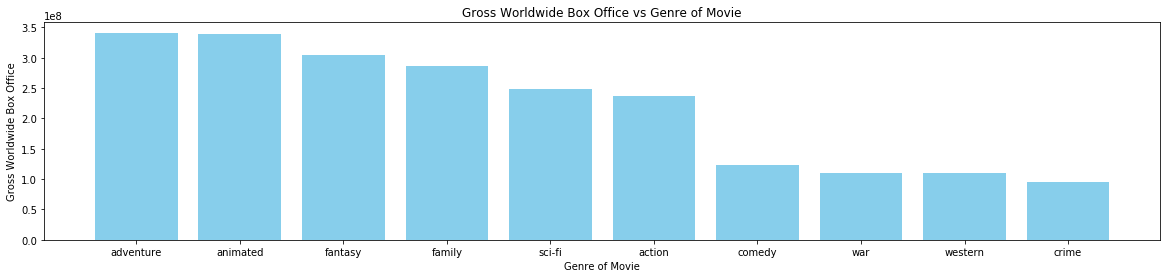

In [15]:
x = output_dataframe.index
y = output_dataframe.iloc[:,0]
x = x[0:10]
y = y[0:10]
fig = plt.figure(figsize = (20,4))
ax = fig.subplots()
ax.bar(x,y,color='skyblue')
ax.set_title('Gross Worldwide Box Office vs Genre of Movie')
ax.set_xlabel('Genre of Movie')
ax.set_ylabel('Gross Worldwide Box Office')


### Evaluation

As we can see almost the same exact 6 genres were vastly above all the others. The biggest difference here is that animated and adventure movies made vastly more money than all the others as the other top 4 drop signifcantly from the first 2.

## Question 2

Who should be hired to give the highest chance of a highly rated movie?

### Data Preperation

In order to find out **who** to hire I am going to need to get the ratings of the movies that they were a part of. This information is located in the **imdb.title.ratings.csv.gz** data set where I extract the movies (given in tconst) and their respective ratings. This is then converted into a dictionary so that an input of a movie's ID (tconst) will return that movie's rating.

In [16]:
# extracting needed columns of tconst and average rating
movie_rating = data['imdb.title.ratings.csv.gz'][['tconst','averagerating']]

# setting the index to the tconst for ease of translation to dictionary
movie_rating.set_index('tconst',inplace=True)

# creating a dictionary of key value pairs:
# key = tconst
# value = rating
tconst_to_rating = movie_rating.to_dict('index')

Now that the dictionary is created I am going to drop all rows where a name does not have any `know_for_titles` or a `primary_profession`. These names can not be considered because there is no way to assign them a rating or score. If they were assigned a score and do not have a primary profession there is no way to know what they did well.

In [17]:
best_people = data['imdb.name.basics.csv.gz'].dropna(subset=['known_for_titles','primary_profession'])

The below funciton (`change_to_name`) takes a person's `known_for_titles` (which is a string of tconsts seperated 

In [18]:
def change_to_name(tconst_string): #x going to be a string 'tt0837562,tt2398241,tt0844471,tt0118553'
    # splitting to have individual tconsts
    tconst_list = tconst_string.split(',')
    rating_list = []
    
    # some tconsts are not in the dataframe so we skip them
    for tconst in tconst_list:
        try:
            #appending this rating to the list
            rating_list.append(tconst_to_rating[tconst]['averagerating'])
        except:
            pass
    
    # taking the mean of all ratings
    if len(rating_list)>0:
        return np.mean(rating_list)
    #if there are no ratings we return NaN
    else:
        return np.nan

In [19]:
# this is to block a strange error with assinging values to data frame splices
pd.options.mode.chained_assignment = None  # default='warn'

This will convert the tconsts into a mean of all ratings of those movies

In [20]:
# input: 'tt0837562,tt2398241,tt0844471,tt0118553' type(string)
# output: 6.0 type(float)
best_people['average_rating'] = best_people['known_for_titles'].apply(change_to_name)

In [21]:
# dropping rows for names who did not have any of their known titles
# match to the ratings database
best_people.dropna(subset=['average_rating'],inplace=True)

The dataframe is then sorted by the ratings that each person recieved. This will allow us to choose those who worked on movies with the highest rating.

In [22]:
best_people = best_people.sort_values('average_rating',ascending=False)

Now that this data is condensed into a single dataframe further indexing is needed in order to find the best actor, writer, etc. This can be done for any profession involved in moving making but the most common are done here.

In [23]:
# best actor
best_actor = best_people[(best_people.primary_profession.str.contains('actor'))]
best_actress = best_people[(best_people.primary_profession.str.contains('actress'))]

# best director
best_director = best_people[(best_people.primary_profession.str.contains('director'))]

# best writer
best_writer = best_people[(best_people.primary_profession.str.contains('writer'))]

### Data Modeling
Describe and justify the process for analyzing or modeling the data.

***
Questions to consider:
* How did you analyze or model the data?
* How did you iterate on your initial approach to make it better?
* Why are these choices appropriate given the data and the business problem?
***

In [24]:
print('TOP 5 ACTORS')
for item in enumerate(list(best_actor["primary_name"].head())):
    print('#{}: {}'.format((item[0]+1),item[1]))

TOP 5 ACTORS
#1: Lance Vogel
#2: Mark Alan Campbell
#3: Seth Michael
#4: Luke Telfer
#5: Benji Riggs


In [25]:
print('TOP 5 ACTRESSES')
for item in enumerate(list(best_actress["primary_name"].head())):
    print('#{}: {}'.format((item[0]+1),item[1]))

TOP 5 ACTRESSES
#1: Cristina Duarte
#2: Donna Schulte
#3: Vickie Doerr
#4: Diane Ferranti
#5: Aurora Sharon Lewis


In [26]:
print('TOP 5 DIRECTORS')
for item in enumerate(list(best_director["primary_name"].head())):
    print('#{}: {}'.format((item[0]+1),item[1]))

TOP 5 DIRECTORS
#1: Cristina Duarte
#2: Michiel Brongers
#3: Masahiro Hayakawa
#4: Daniel Alexander
#5: Vickie Doerr


In [27]:
print('TOP 5 WRITERS')
for item in enumerate(list(best_writer["primary_name"].head())):
    print('#{}: {}'.format((item[0]+1),item[1]))

TOP 5 WRITERS
#1: Cristina Duarte
#2: Lance Vogel
#3: Michiel Brongers
#4: Daniel Alexander
#5: Don McClendon


### Evaluation

In the lists above we can see those actors/actresses, dirtors, and writers worked on movies that recieved the highest ratings. This does not mean that they will produce highly rated content but that they have produced highly rated content in the past.

***
Questions to consider:
* How do you interpret the results?
* How well does your model fit your data? How much better is this than your baseline model?
* How confident are you that your results would generalize beyond the data you have?
* How confident are you that this model would benefit the business if put into use?
***

## Conclusions
Provide your conclusions about the work you've done, including any limitations or next steps.

***
Questions to consider:
* What would you recommend the business do as a result of this work?
* What are some reasons why your analysis might not fully solve the business problem?
* What else could you do in the future to improve this project?
***